In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
import warnings

warnings.filterwarnings('ignore')

In [12]:
payments_1 = pd.read_csv('data/payments_1.csv')
payments_2 = pd.read_csv('data/payments_2.csv')

payments = pd.concat([payments_1, payments_2]).reset_index(drop=True)


In [13]:
payments

,eventTimeRes,amount,cur,payment,cardToken
0,2024-11-25 20:59:59,90000.00,UZS,7d1476c9f1eedcd4a2083cc399ec1c1b,7ba0e52864c29fe2fcc1977be1ffc8d5
1,2024-11-25 20:59:58,2700.00,RUB,6eb49e22afdd28083ff82cdff8068880,774d551c9fff62fbac6c4ef424af0446
2,2024-11-25 20:59:58,2000.00,RUB,0e2705d1083b67f2c5ea12de3b7ab182,a3481a01b54d0c96dd44200389888bc6
3,2024-11-25 20:59:58,27.27,AZN,c30b3850e85454145bcb0dda3d209d88,61e3567ab56a79911fb7bcc0cc13db64
4,2024-11-25 20:59:58,8.00,AZN,4af690ba4eebb6d4782d9a3051dc58d2,373e0a66a63b8661f10afd098c68aeab
...,...,...,...,...,...
393027,2024-11-25 21:00:04,154.00,TRY,df37ef69adeffbf13245515035211a6a,dedbb3a4a41549a49d00dff275d2fa33
393028,2024-11-25 21:00:02,90000.00,UZS,22fa8e82050c2a448785dad1dc8e56ce,28873fe44be85e056f0f551cbe95e1a8
393029,2024-11-25 21:00:01,8.00,AZN,2916273333ab3ed18d68704248f73ccb,2cb1592a04ec78b2a5e8320d0d9b5de7
393030,2024-11-25 21:00:00,9.00,AZN,d740af44a63e64d3b220cf3dcb5d553c,dc704af94496050774cb55cd53e995f5


In [14]:
payments['eventHour'] = pd.to_datetime(payments['eventTimeRes']).dt.floor('H')


In [15]:
hourly_payments = payments.groupby(['eventHour', 'cur'])['amount'].sum().reset_index()


In [16]:
# Переименование столбцов для Prophet
hourly_payments.rename(columns={'eventHour': 'ds', 'amount': 'y'}, inplace=True)

# Шаг 2: Анализ Временных Рядов
# Пример для одной валюты (например, RUB)
currency = 'RUB'
df_currency = hourly_payments[hourly_payments['cur'] == currency][['ds', 'y']].copy()
df_currency['ds'] = pd.to_datetime(df_currency['ds'])

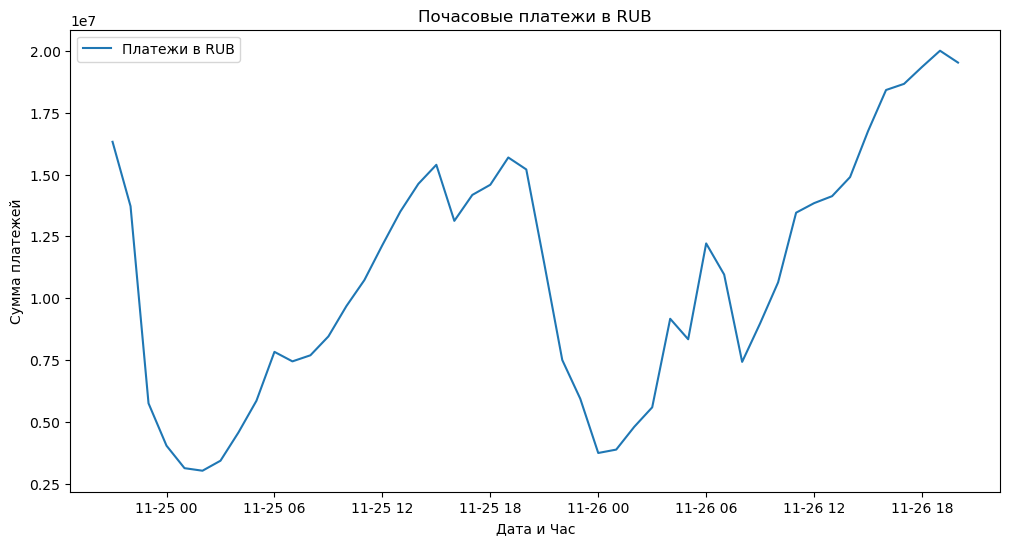

In [18]:
# Визуализация
plt.figure(figsize=(12, 6))
plt.plot(df_currency['ds'], df_currency['y'], label=f'Платежи в {currency}')
plt.xlabel('Дата и Час')
plt.ylabel('Сумма платежей')
plt.title(f'Почасовые платежи в {currency}')
plt.legend()
plt.show()

In [19]:
model = Prophet(
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=True
)
# Добавление почасовой сезонности
model.add_seasonality(name='hourly', period=24, fourier_order=3)

model.fit(df_currency)

04:13:14 - cmdstanpy - INFO - Chain [1] start processing
04:13:14 - cmdstanpy - INFO - Chain [1] done processing


In [24]:
df_currency

,ds,y
6,2024-11-24 21:00:00,1.632541e+07
15,2024-11-24 22:00:00,1.372003e+07
23,2024-11-24 23:00:00,5.746283e+06
31,2024-11-25 00:00:00,4.032558e+06
40,2024-11-25 01:00:00,3.123646e+06
49,2024-11-25 02:00:00,3.020191e+06
58,2024-11-25 03:00:00,3.424792e+06
66,2024-11-25 04:00:00,4.569119e+06
74,2024-11-25 05:00:00,5.851262e+06
82,2024-11-25 06:00:00,7.828313e+06


In [23]:
model.make_future_dataframe(periods=12, freq='H')

,ds
0,2024-11-24 21:00:00
1,2024-11-24 22:00:00
2,2024-11-24 23:00:00
3,2024-11-25 00:00:00
4,2024-11-25 01:00:00
5,2024-11-25 02:00:00
6,2024-11-25 03:00:00
7,2024-11-25 04:00:00
8,2024-11-25 05:00:00
9,2024-11-25 06:00:00


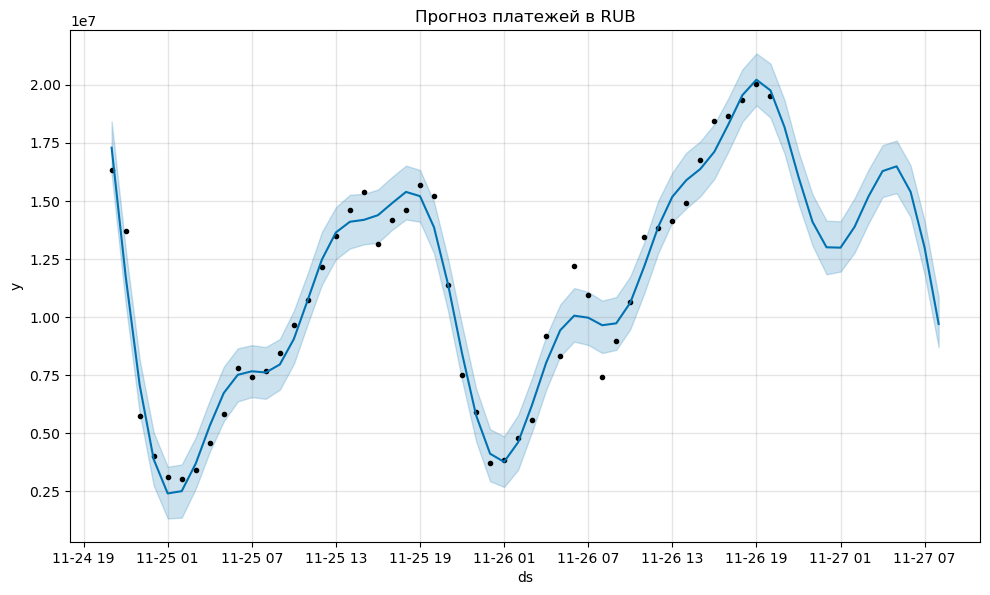

In [30]:
future = model.make_future_dataframe(periods=12, freq='H')
forecast = model.predict(future)

# Визуализация прогноза
fig1 = model.plot(forecast)
plt.title(f'Прогноз платежей в {currency}')
plt.show()

In [32]:
fig1.savefig('plot.png', dpi=300, bbox_inches='tight')